<a href="https://colab.research.google.com/github/PTC-Education/PTC-API-Playground/blob/main/View_Matrix_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Import and Setup Onshape Client

!pip install onshape-client
from onshape_client.client import Client
from onshape_client.onshape_url import OnshapeElement
import json

#@markdown Chage the base if using an enterprise (i.e. "https://ptc.onshape.com")
base = 'https://cad.onshape.com' #@param {type:"string"}

#@markdown Would you like to import your API keys from a file, or copy and paste them directly?
keyImportOption = "Copy/Paste Keys" #@param ["Upload Keys from File", "Copy/Paste Keys"]

from IPython.display import clear_output 
clear_output()
print("Onshape Client successfully imported!")

if keyImportOption == "Upload Keys from File":
  from google.colab import files
  uploaded = files.upload()
  for fn in uploaded.keys():
    execfile(fn)

  client = Client(configuration={"base_url": base,
                                "access_key": access,
                                "secret_key": secret})
  clear_output()
  print('Onshape client configured - ready to go!')
else:
  access = input("Paste your Onshape Access Key: ")
  secret = input("Paste your Onshape Secret Key: ")
  client = Client(configuration={"base_url": base,
                                "access_key": access,
                                "secret_key": secret})
  clear_output()
  print('Onshape client configured - ready to go!')


In [ ]:
#@title Run this cell to load a library of functions for view matrices

import math
import numpy

#@markdown The function `mult(x,y)` multiplies two 4x3 view matrices to get their determinant

def mult(x,y):
  result = numpy.matmul(x,y)
  return result

#@markdown The function `IdentityTwelve()` returns a flattened identity view matrix (1x12)
def IdentityTwelve():
  m = [
      1, 0, 0, 0,
      0, 1, 0, 0,
      0, 0, 1, 0
      ]
  return m

#@markdown The function `Move(base,x1,y1,z1)` takes a 1x12 view matrix and moves the x,y,z coordinates
def Move(base,x1,y1,z1):
  matrix = base
  matrix[3] = x1
  matrix[7] = y1
  matrix[11] = z1
  return matrix

#@markdown The function `twelveToThreeByFour(matrix)` takes a flattened 1x12 view matrix and makes a 4x3 matrix for linear algrebra
def twelveToThreeByFour(matrix):
  threebyfour = [[matrix[0],matrix[1],matrix[2],matrix[3]],
                [matrix[4],matrix[5],matrix[6],matrix[7]],
                [matrix[8],matrix[9],matrix[10],matrix[11]]]
  return threebyfour

#@markdown The function `threeByFourToTwelve(matrix)` takes a 4x3 view matrix and flattens it to 1x12, the form used by Onshape
def threeByFourToTwelve(matrix):
  twelve = [matrix[0][0],matrix[0][1],matrix[0][2],matrix[0][3],
             matrix[1][0],matrix[1][1],matrix[1][2],matrix[1][3],
             matrix[2][0],matrix[2][1],matrix[2][2],matrix[2][3]]
  return twelve

def fourByFourToThreeByFour(matrix):
  matrix.pop(3)
  return matrix

def clockwiseSpinX(theta):
  m = [[1, 0, 0, 0],
       [0, math.cos(theta), math.sin(theta), 0],
       [0, -math.sin(theta), math.cos(theta), 0],
       [0, 0, 0, 1]
       ]
  return m

#@markdown The function `clockwiseSpinY(theta)` returns a 4x3 matrix with a rotation of theta around the y axis. Same is available for X and Z
def clockwiseSpinY(theta):
  m = [[math.cos(theta), 0, math.sin(theta), 0],
       [0, 1, 0, 0],
       [-math.sin(theta), 0, math.cos(theta), 0],
       [0, 0, 0, 1]
       ]
  return m

def clockwiseSpinZ(theta):
  m = [[math.cos(theta), math.sin(theta), 0, 0],
       [-math.sin(theta), math.cos(theta), 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]]
  return m


In [ ]:
from IPython.display import Image
import base64

def partStudioShadedView(url:str,viewMatrix = [0.612,0.612,0,-0.2,-0.354,0.354,0.707,-0.1,0.707,-0.707,0.707,0]):
  fixed_url = '/api/partstudios/d/did/w/wid/e/eid/shadedviews'
  element = OnshapeElement(url)
  fixed_url = fixed_url.replace('did', element.did)
  fixed_url = fixed_url.replace('wid', element.wvmid)
  fixed_url = fixed_url.replace('eid', element.eid)

  method = 'GET'

  matrix = str(viewMatrix).replace('[','').replace(']','')
  # print(matrix)

  ## View Matrix below is roughly isometric
  params = {'viewMatrix':matrix,
            'edges':'show',
            'outputHeight':600,
            'outputWidth':1000,
            'pixelSize':0.001}
  # print(params)
  payload = {}
  headers = {'Accept': 'application/vnd.onshape.v1+json',
              'Content-Type': 'application/json'}

  response = client.api_client.request(method, url=base + fixed_url, query_params=params, headers=headers, body=payload)

  parsed = json.loads(response.data)

  imgdata = base64.b64decode(parsed['images'][0])

  Image(imgdata)

  with open("image.jpg", 'wb') as f:
      f.write(imgdata)

{'viewMatrix': '0.5403023058681398, 0.0, 0.8414709848078965, -0.3, -0.7080734182735712, 0.5403023058681398, 0.4546487134128409, 0.1, -0.4546487134128409, -0.8414709848078965, 0.2919265817264289, 0', 'edges': 'show', 'outputHeight': 600, 'outputWidth': 1000, 'pixelSize': 0.001}


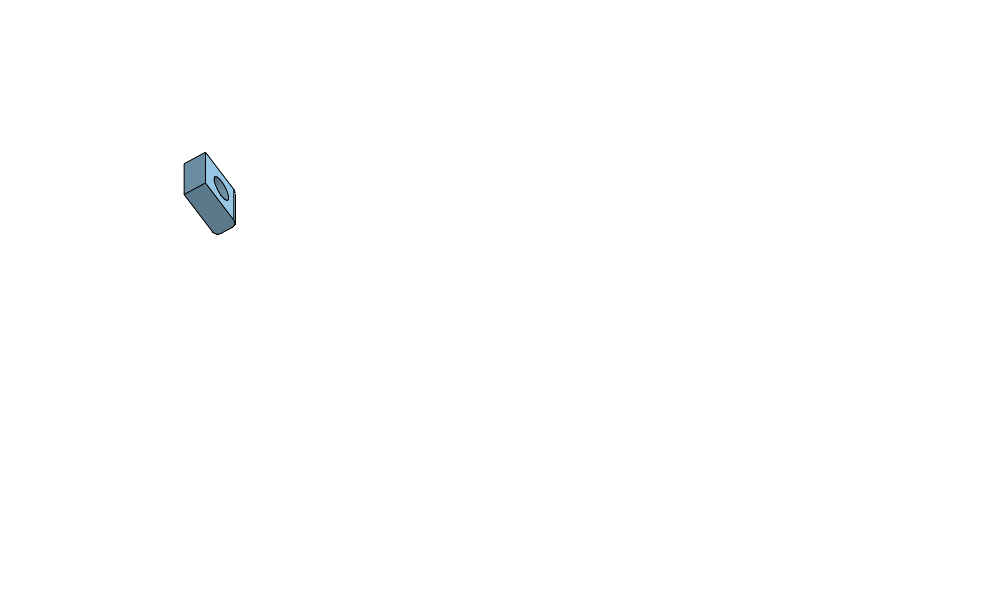

In [ ]:
url = 'https://cad.onshape.com/documents/72d50e005ecf52ceb1363c56/w/69736179d8f29b14d14377cb/e/b2aa4d8ba21396ff6cb8fff5'
baseMat = threeByFourToTwelve(mult(clockwiseSpinX(1),clockwiseSpinY(1)))
viewMat = Move(baseMat,-0.3,0.1,0)
partStudioShadedView(url,viewMat)
Image("image.jpg")